#Adquisición de datos

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('hips_train.csv')
df2 = pd.read_csv('hips_test.csv')

In [19]:
#df[df['class']=='neutral']
X = df.drop('class', axis=1)
Y = df['class']

In [20]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=42)

In [21]:
X_test = df2.drop('class', axis=1)
Y_test = df2['class']

In [22]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(1037, 132)
(1037,)
(183, 132)
(183,)
(132, 132)
(132,)


#Entrenamiento con sklearn

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC

import pickle

In [42]:
model = LogisticRegression(multi_class='multinomial', solver='newton-cholesky', penalty=None, C=0.01)
#model = SVC(kernel='rbf', probability=True)

In [43]:
model.fit(X_train, Y_train)

LogisticRegression(C=0.01, multi_class='multinomial', penalty=None,
                   solver='newton-cholesky')

In [39]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X, Y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)

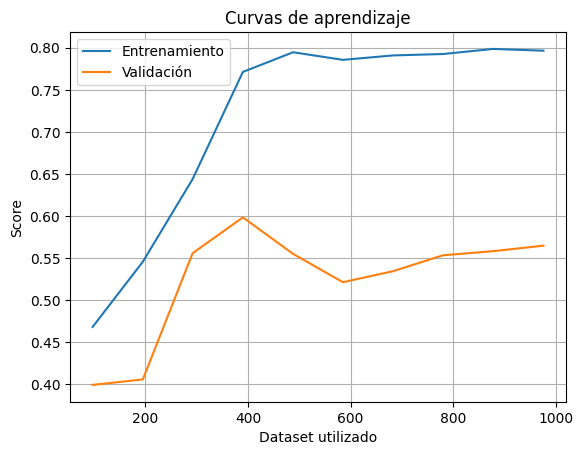

In [40]:
import matplotlib.pyplot as plt

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.title("Curvas de aprendizaje")
plt.plot(train_sizes, train_scores_mean, label="Entrenamiento")
plt.plot(train_sizes, val_scores_mean, label="Validación")
plt.xlabel("Dataset utilizado")
plt.ylabel("Score")

plt.legend()
plt.grid()
plt.show()

In [44]:
y_test_pred = model.predict(X_test)

In [45]:
y_test_pred

array(['wide', 'narrow', 'narrow', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'narrow', 'narrow', 'narrow', 'narrow', 'narrow', 'narrow',
       'neutral', 'wide', 'wide', 'wide', 'wide', 'wide', 'wide', 'wide',
       'wide', 'wide', 'wide', 'wide', 'wide', 'wide', 'wide', 'wide',
       'wide', 'wide', 'wide', 'wide', 'wide', 'wide', 'wide', 'wide',
       'wide', 'wide', 'wide', 'w

In [46]:
Y_test

,class
0,wide
1,wide
2,wide
3,wide
4,wide
...,...
127,narrow
128,narrow
129,narrow
130,narrow


#Evaluación y exportado a pickle

In [47]:
precision_score(Y_test, y_test_pred, average='macro')

0.7044817927170869

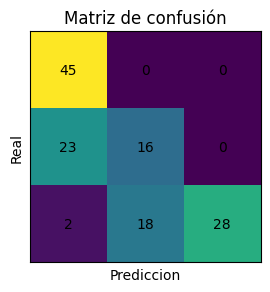

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_test_pred)

plt.figure(figsize=(3,3))
plt.title('Matriz de confusión')
plt.imshow(confusion_matrix)
plt.ylabel('Real')
plt.xlabel('Prediccion')
plt.xticks([])
plt.yticks([])

filas, cols = confusion_matrix.shape
for r in range(filas):
  for c in range(cols):
    plt.text(c, r, str(confusion_matrix[r, c]),
        ha='center', va='center', color='black')
plt.show()

In [49]:
with open('hips.pkl', 'wb') as f:
  pickle.dump(model, f)

#Deprecated

Estos usé cuando quería hacer la curva de apredizaje con los loss no con los scores, por lo que usé estimators muy malos en multinomial, por lo que la presición era muy mala

In [13]:
# Partial fit requires knowing the class labels in advance
classes = np.unique(Y_train)

for epoch in range(n_epochs):
    model.partial_fit(X_train, Y_train, classes=classes)

    # Training loss
    y_pred = model.predict_proba(X_train)
    train_loss = log_loss(Y_train, y_pred)
    train_losses.append(train_loss)

    # Validation loss
    y_val_pred = model.predict_proba(X_val)
    val_loss = log_loss(Y_val, y_val_pred)
    val_losses.append(val_loss)

AttributeError: 'LogisticRegression' object has no attribute 'partial_fit'

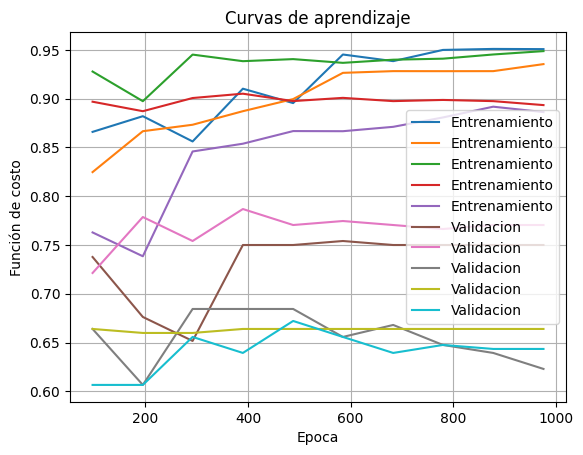

In [31]:
#curvas de aprendizaje
import matplotlib.pyplot as plt

plt.plot(range(n_epochs), train_losses, label='Entrenamiento')
plt.plot(range(n_epochs), val_losses, label='Validacion')
plt.xlabel('Epoca')
plt.ylabel('Función de costo')
plt.title('Curvas de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()